Первое задание: 
1.   dataset: boston house prices
2.   Методы: Линейная регрессия, Надарая Ватсон, SVR



Библиотеки

In [ ]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [ ]:
from sklearn.datasets import load_boston #Загрузить датасет

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
#import scipy.stats as stats 

import seaborn as sns 


#Разделить массивы или матрицы на случайные обучающие и тестовые подмножества.
from sklearn.model_selection import train_test_split 

#линейная регрессия методом наименьших квадратов --sklearn
from sklearn.linear_model import LinearRegression 

#Получить оценку для коэффициентов R2, RMSE
from sklearn.metrics import mean_squared_error, r2_score   


#Вычислить расстояние между каждой парой двух коллекций входных данных.
from scipy.spatial.distance import cdist

from sklearn.svm import SVR


#Скачивание выборки

In [ ]:
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


Теперь мы загрузим данные в кадр данных pandas. Затем мы печатаем первые 5 строк данных,

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


MEDV отсутствует. Мы создаем новый столбец целевых значений и добавляем MEDV в фрейм данных.

In [ ]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#Провести анализ выборки

##Определить тип признаков

In [ ]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

1. CRIM - уровень преступности на душу населения по городам
2. ZN - доля земель под жилую застройку, зонированных под участки свыше 25 000 кв.м.3
3. INDUS - доля акров неторгового бизнеса на город.
4. CHAS - фиктивная переменная реки Чарльз (1, если участок граничит с рекой; 0 в противном случае)
5. NOX -концентрация оксидов азота (частей на 10 млн)
6. RM - среднее количество комнат в жилом помещении
7. AGE - доля жилых единиц, построенных до 1940 г.
8. DIS - взвешенные расстояния до пяти центров занятости Бостона.
9. RAD -  индекс доступности к радиальным магистралям
10. TAX - полная ставка налога на имущество за 10 000 долларов США.
11. PTRATIO - соотношение учеников и учителей по городам
12. B - (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.
13. LSTAT-  % более низкий статус населения
14. MEDV- Средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

## Виртуальный анализ данных

Подсчитывавать количество пропущенных значений для каждой функции

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

вычислить парную корреляцию для всех столбцов

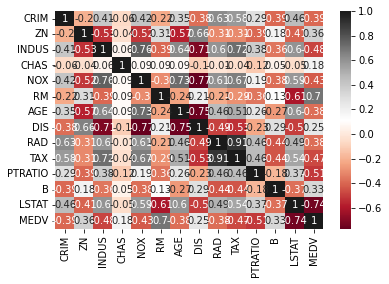

In [ ]:
corr = boston.corr().round(2)
sns.heatmap(data = corr, cmap = 'RdGy',annot=True) 

Коэффициент корреляции находится в диапазоне от -1 до 1. Если значение близко к 1, это означает, что между двумя переменными существует сильная положительная корреляция. Когда он близок к -1, переменные имеют сильную отрицательную корреляцию.
Глядя на корреляционную матрицу, мы видим, что RM она имеет сильную положительную корреляцию с MEDV(0,7), тогда как as LSTAT имеет сильную отрицательную корреляцию с MEDV(-0,74).

### Проэктируем все объекты на двумерные плоскости,

 Для отрицательной корреляции.

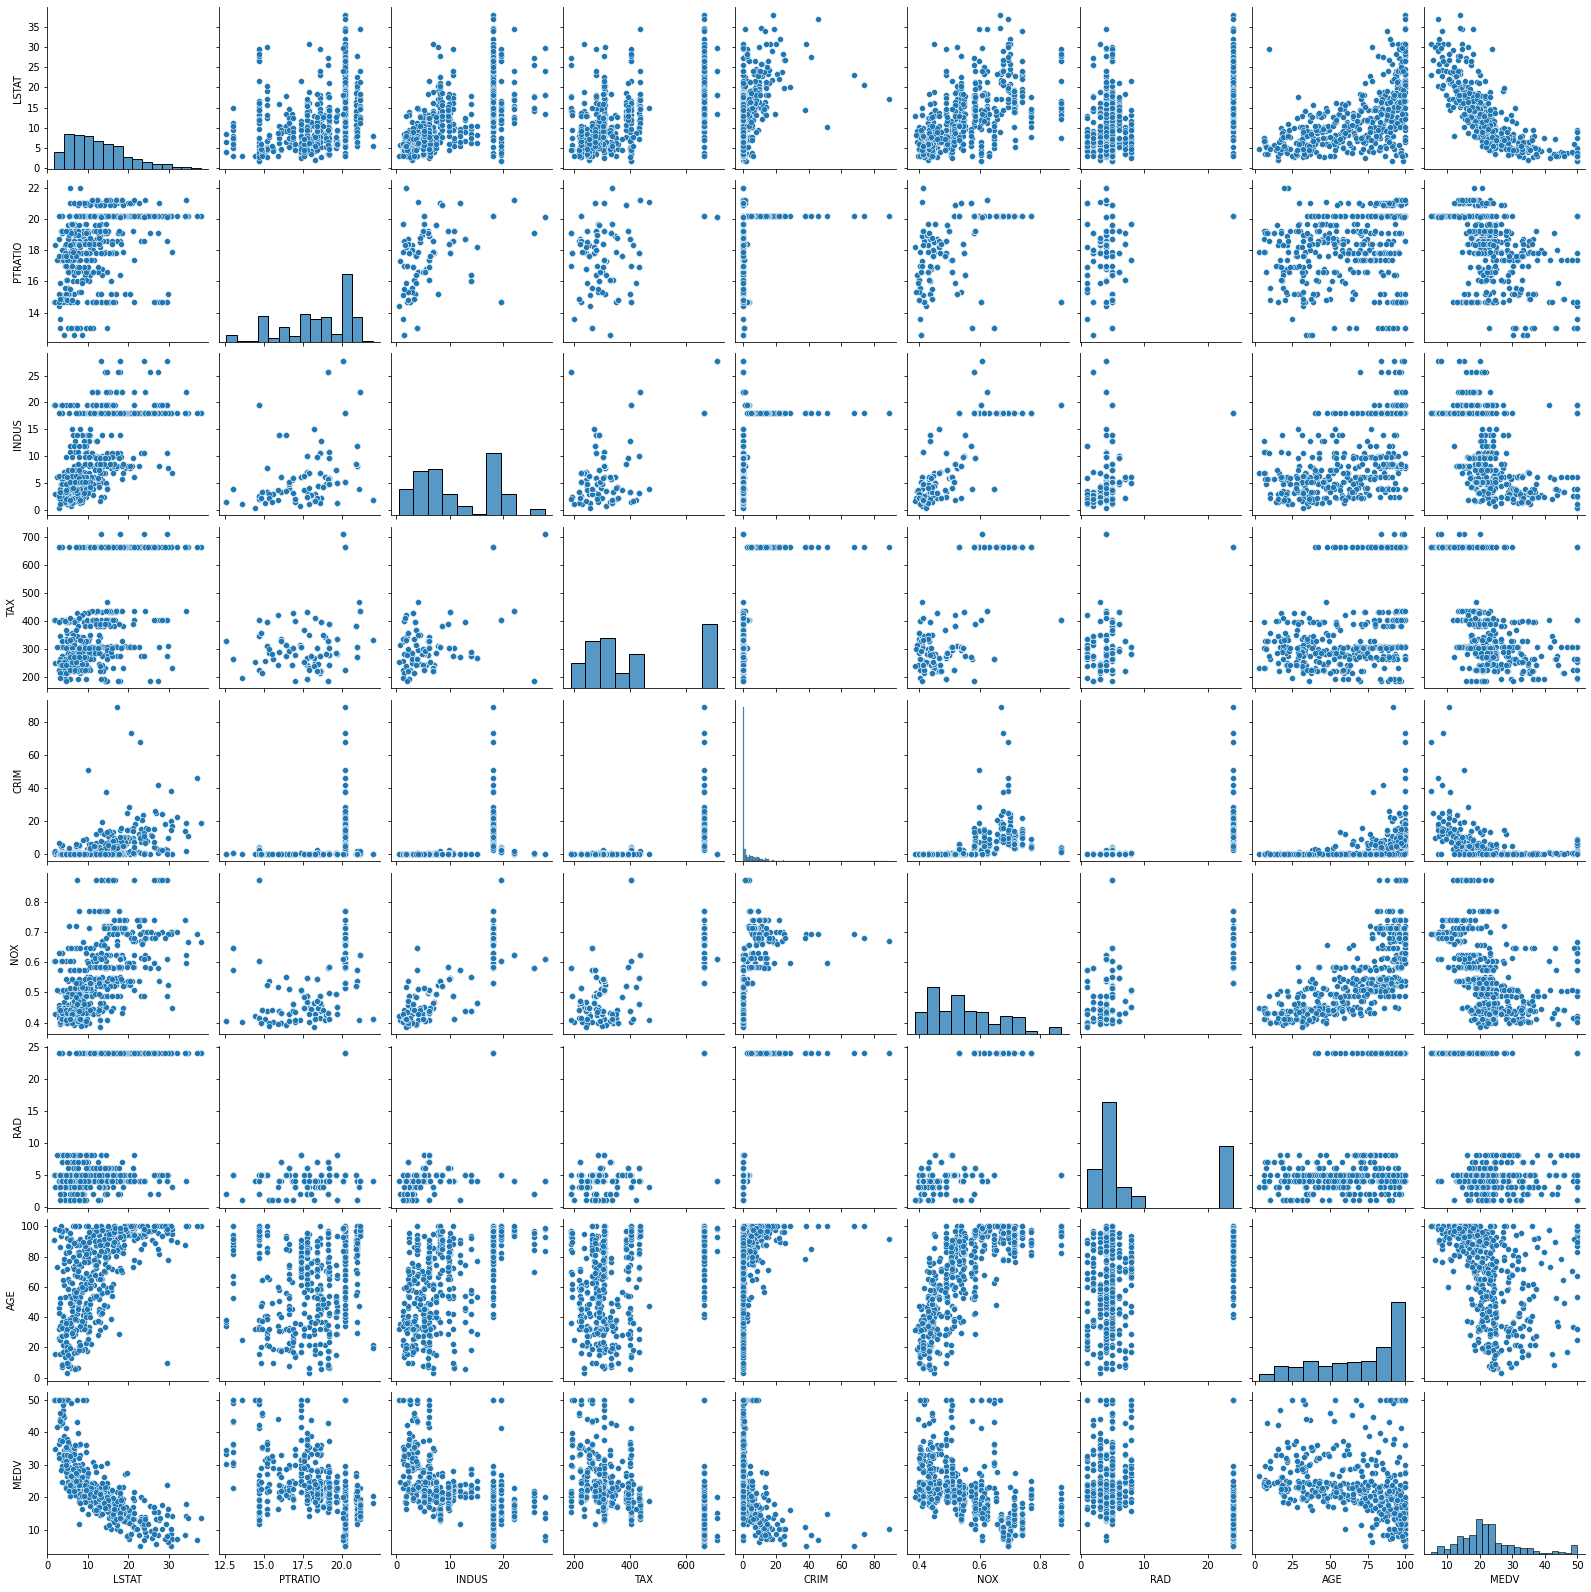

In [ ]:
sns.pairplot(boston, vars = ['LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'CRIM', 'NOX', 'RAD', 'AGE', 'MEDV'])

Для положительное корреляции.

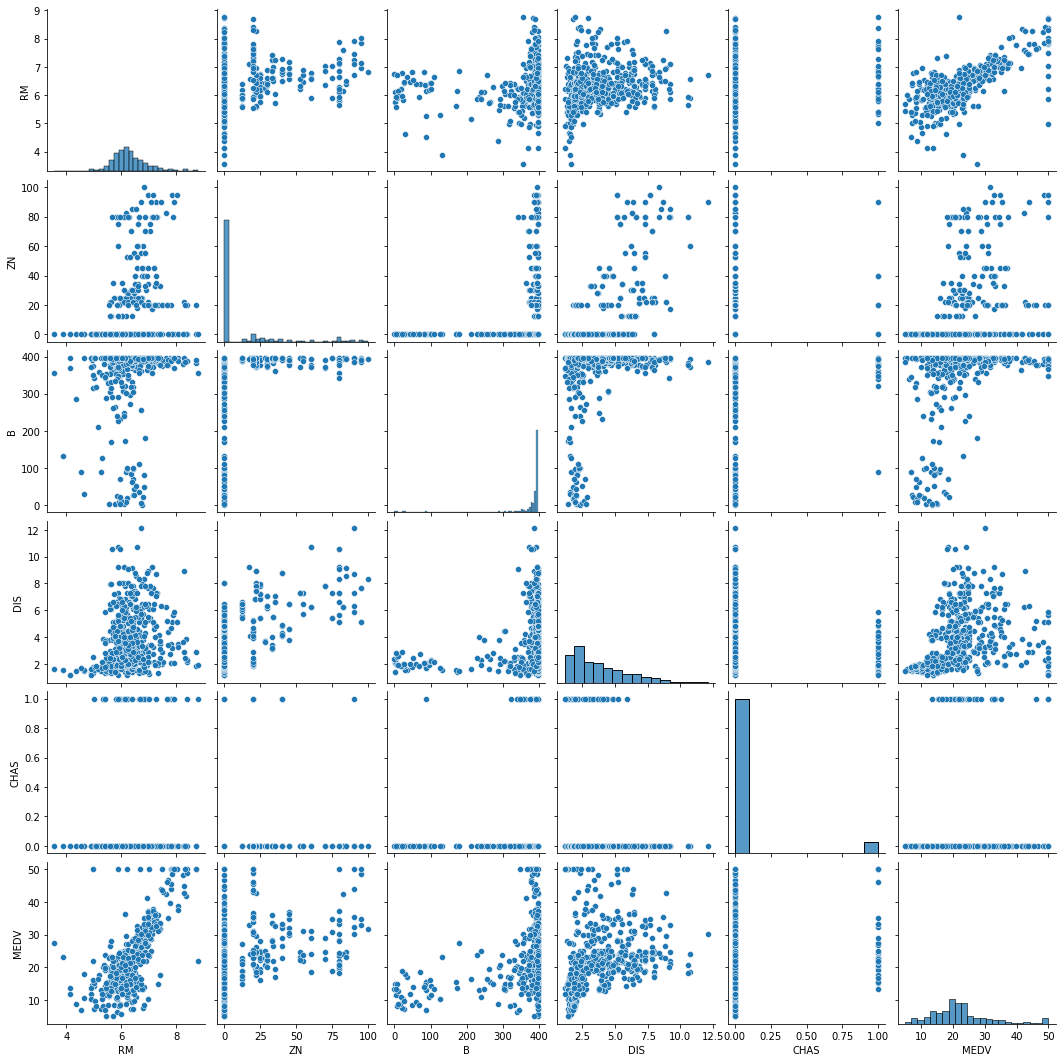

In [ ]:
sns.pairplot(boston, vars = ['RM', 'ZN', 'B', 'DIS', 'CHAS','MEDV'])

# Выполнить препроцесинг данных:

Отнормировать признаки Min-Max scaling

In [ ]:
# Получить признаки X и соответствующие им значения Y

task = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X  = boston[task]
Y = boston['MEDV']

In [ ]:
# найти максимум и минимум для каждой признаки
max = {}
min ={}
for i in task:
  max[i] = X[i].max() 
  min[i] = X[i].min()
  #Нормировать для X
  X[i] = (X[i] - min[i])/ (max[i]- min[i])
#Нормировать для Y
Y = (Y - Y.min())/(Y.max() - Y.min())

Получить обучающую и тестированную выборки

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [ ]:
#from sklearn.preprocessing import StandardScaler
#X_scaler = StandardScaler()
#X_scaler.fit(X_train)
#X_train = X_scaler.transform(X_train)
#X_test = X_scaler.transform(X_test)

#Методы регрессии

##Линейная регрессия

In [ ]:
model = LinearRegression()
_ = model.fit(X_train, Y_train)


Оценочные коэффициенты для задачи линейной регрессии w = (w1, …, wp)

In [ ]:
model.coef_

array([-0.25860549,  0.1097845 ,  0.00066403,  0.06011925, -0.17233614,
        0.39594504,  0.00241429, -0.36487256,  0.18626033, -0.15337847,
       -0.19893944,  0.10354447, -0.47842928])

In [ ]:
coef = pd.DataFrame({"Признаки":task, "Коэффициент": model.coef_})
coef

,Признаки,Коэффициент
0,CRIM,-0.258605
1,ZN,0.109784
2,INDUS,0.000664
3,CHAS,0.060119
4,NOX,-0.172336
5,RM,0.395945
6,AGE,0.002414
7,DIS,-0.364873
8,RAD,0.186260
9,TAX,-0.153378


Kоэффициент детерминации и RMSE на обучении и на контроле

In [ ]:
y_train_predict = model.predict(X_train)
rmse_train_1 = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_train_1 = r2_score(Y_train, y_train_predict)

y_test_predict = model.predict(X_test)
rmse_test_1 = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test_1 = r2_score(Y_test, y_test_predict)

In [ ]:
# Напечатать
print('rmse_ train', rmse_train_1)
print('r2_ train', r2_train_1)
print('rmse_ test', rmse_test_1)
print('r2_ test', r2_test_1)


rmse_ train 0.1053555776052559
r2_ train 0.738339392059052
rmse_ test 0.10151760094007138
r2_ test 0.733449214745307


Можно увидеть связи Y_test и Y_test_predict; Y_train и Y_train_predict, чтобы увидеть точность метода.

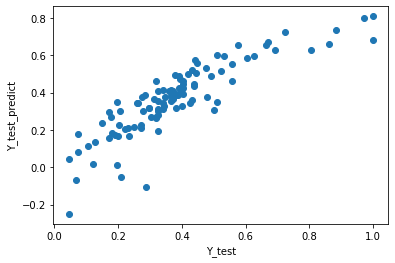

Text(0, 0.5, 'Y_train_predict')

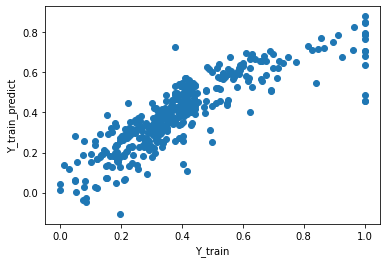

In [ ]:
#Нарисовать связь Y_test и Y_test_predict
plt.scatter(Y_test,y_test_predict)
plt.xlabel('Y_test')
plt.ylabel('Y_test_predict')
plt.show()
#Нарисовать связь Y_train и Y_train_predict
plt.scatter(Y_train,y_train_predict)
plt.xlabel('Y_train')
plt.ylabel('Y_train_predict')

##Надарея Ватсон

Класс для этой формулы

In [ ]:

class FNV(object):
    def __init__(self, kernel=None):
        self.X, self.Y = None, None
        self.kernel = lambda x: np.ones_like(x)
        if kernel is not None:
            self.kernel = kernel
    def predict(self, X):
        features = np.sum(self.Y*self.kernel(cdist(X, self.X)), axis=-1)
        return features/(np.sum(self.kernel(cdist(X, self.X)), axis=-1)+1e-10)
    def fit(self, X, Y, epoch=10):
        self.X, self.Y = np.array(X), np.array(Y)

Функции ядер

In [ ]:
#Квадратичное
def K(distance, h=0.2):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)
#Гауссовское
def G(distance, h = 0.2):
  ret = np.array(distance)/h
  return np.exp(-2*ret**2)
#Треугольное
def T(distance, h =0.2):
  ret= np.array(distance)/h
  return (1-np.abs(ret))*(np.abs(ret)<= 1)

Провести эксперимент для каждого ядра с шириной окна в интервале (0.2, 1)

In [ ]:
H = np.arange(0.2, 1,0.05)  #Ширина окна

Квадратичное ядро

In [ ]:
#коэффициент детерминации на обучении и на контроле
r2_test_K = []
r2_train_K = []
for h in H:

  model = FNV(kernel=lambda X_train: K(X_train, h=h))
  _ = model.fit(X_train, Y_train)
  
  y_train_predict = model.predict(X_train)
  r2_train_K.append(r2_score(Y_train, y_train_predict))
  
  y_test_predict = model.predict(X_test)
  r2_test_K.append(r2_score(Y_test, y_test_predict))
 

для Гауссовкого ядра

In [ ]:
#коэффициент детерминации  на обучении и на контроле
r2_test_G = []
r2_train_G = []
for h in H:

  model = FNV(kernel=lambda X_train: G(X_train, h=h))
  _ = model.fit(X_train, Y_train)
  
  y_train_predict = model.predict(X_train)
  r2_train_G.append(r2_score(Y_train, y_train_predict))
  

  y_test_predict = model.predict(X_test)
  r2_test_G.append(r2_score(Y_test, y_test_predict))

 

для Треугольного ядра

In [ ]:

# коэффициент детерминации на обучении и на контроле
r2_test_T = []
r2_train_T = []
for h in H:

  model = FNV(kernel=lambda X_train: T(X_train, h=h))
  _ = model.fit(X_train, Y_train)
  
  y_train_predict = model.predict(X_train)
  r2_train_T.append(r2_score(Y_train, y_train_predict))
  

  y_test_predict = model.predict(X_test)
  r2_test_T.append(r2_score(Y_test, y_test_predict))
 

Построить графики R2 трех ядер с разными ширинами h в H

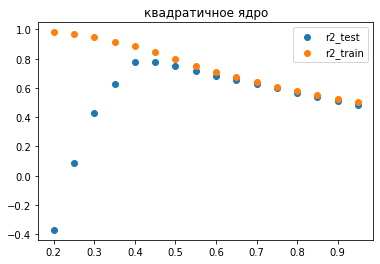

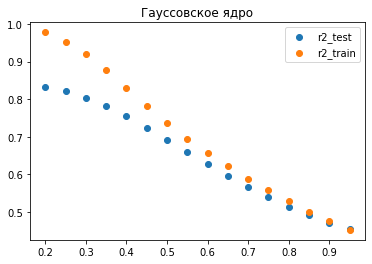

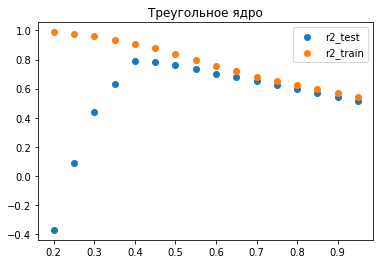

In [ ]:
plt.title('квадратичное ядро')
plt.scatter(H, r2_test_K, label= 'r2_test')
plt.scatter(H, r2_train_K, label = 'r2_train')
plt.legend(loc='best')
plt.show() 
plt.title('Гауссовское ядро')
plt.scatter(H, r2_test_G, label= 'r2_test')
plt.scatter(H, r2_train_G, label = 'r2_train')
plt.legend(loc='best')
plt.show() 
plt.title('Треугольное ядро')
plt.scatter(H, r2_test_T, label= 'r2_test')
plt.scatter(H, r2_train_T, label = 'r2_train')
plt.legend(loc='best')
plt.show()

Нужно ядро, у которого есть наибольший R2_test. Из трех экспериментов получить самое хорошее ядро - Гауссовское с h = (0.2;0.3)
Еще раз провести эксперимет для этого ядра с  h = (0.2;0.3)

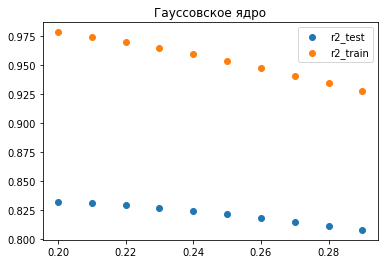

In [ ]:
# коэффициент детерминации на обучении и на контроле
r2_test_G = []
r2_train_G = []
H = np.arange(0.2,0.3,0.01)
for h in H:
  
  model = FNV(kernel=lambda X_train: G(X_train, h=h))
  _ = model.fit(X_train, Y_train)
  
  y_train_predict = model.predict(X_train)
  r2_train_G.append(r2_score(Y_train, y_train_predict))
  

  y_test_predict = model.predict(X_test)
  r2_test_G.append(r2_score(Y_test, y_test_predict))

#Построить график зависимости R2 от h
plt.title('Гауссовское ядро')
plt.scatter(H, r2_test_G, label= 'r2_test')
plt.scatter(H, r2_train_G, label = 'r2_train')
plt.legend(loc='best')
plt.show()

In [ ]:
#Найти h, при котором R2_test достигает максимума 
max = 0

for i in range(len(r2_test_G)):
  if max<r2_test_G[i]:
    max = r2_test_G[i]
    h = H[i]
print(h)

0.2


Итоговая модель

In [ ]:
model = FNV(kernel=lambda X_train: G(X_train, h=h))
_ = model.fit(X_train, Y_train)

y_train_predict = model.predict(X_train)
rmse_train_2 = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_train_2 = r2_score(Y_train, y_train_predict)

y_test_predict = model.predict(X_test)
rmse_test_2 = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test_2 = r2_score(Y_test, y_test_predict)


Kоэффициент детерминации и RMSE на обучении и на контроле

In [ ]:
print('rmse_ train', rmse_train_2)
print('r2_ train', r2_train_2)
print('rmse_ test', rmse_test_2)
print('r2_ test', r2_test_2)

rmse_ train 0.030349238312590503
r2_ train 0.9782870479652557
rmse_ test 0.08053940474394213
r2_ test 0.8322300769740747


Нарисовать Y; Y predicted

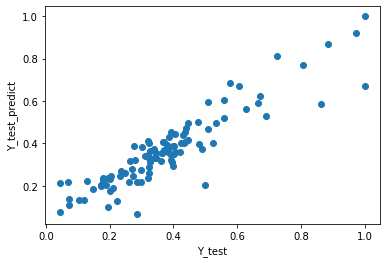

Text(0, 0.5, 'Y_train_predict')

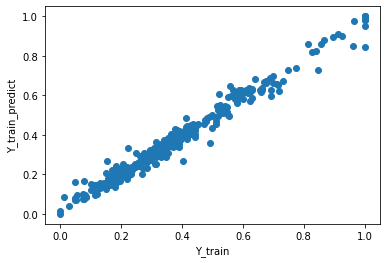

In [ ]:
#Нарисовать связь Y_test и Y_test_predict
plt.scatter(Y_test,y_test_predict)
plt.xlabel('Y_test')
plt.ylabel('Y_test_predict')
plt.show()
#Нарисовать связь Y_train и Y_train_predict
plt.scatter(Y_train,y_train_predict)
plt.xlabel('Y_train')
plt.ylabel('Y_train_predict')

## SVR

Провести эксперимент для С и ядер

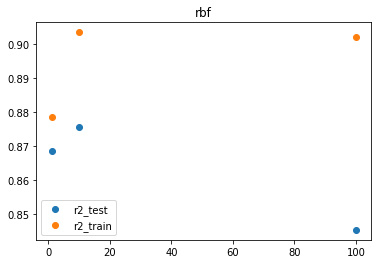

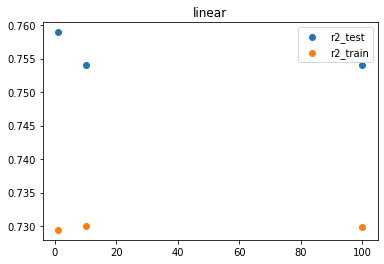

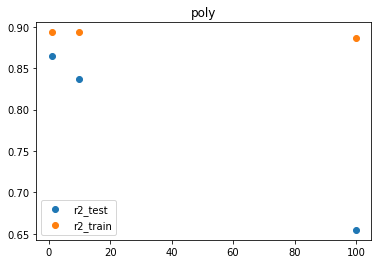

In [ ]:
# Три ядра
kernels =['rbf', 'linear','poly']
#параметр С
C_parametrs = [1, 10,100]

for i in kernels:
  r2_test = []
  r2_train = []
  
  for C in C_parametrs:
    model = SVR(kernel = i, C= C)
    _ = model.fit(X_train, Y_train)
    y_train_predict = model.predict(X_train)
    r2_train.append(r2_score(Y_train, y_train_predict))


    y_test_predict = model.predict(X_test)
    r2_test.append(r2_score(Y_test, y_test_predict))
  #Построть графики R2
  plt.title(i)
  plt.scatter(C_parametrs, r2_test, label= 'r2_test')
  plt.scatter(C_parametrs, r2_train, label= 'r2_train')
  plt.legend(loc = 'best')
  plt.show()



Нужно ядро, у которого есть наибольший R2_test. Из трех экспериментов получить самое лучшее ядро - RBF. Значение С в интервале (5,15)

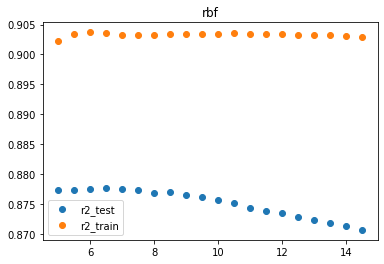

In [ ]:
r2_test = []
r2_train = []
C_parametr = np.arange(5,15,0.5)

for C in C_parametr:
    model = SVR(kernel = 'rbf', C = C)
    _ = model.fit(X_train, Y_train)

    y_train_predict = model.predict(X_train)
    r2_train.append(r2_score(Y_train, y_train_predict))


    y_test_predict = model.predict(X_test)
    r2_test.append(r2_score(Y_test, y_test_predict))
plt.title('rbf')
plt.scatter(C_parametr, r2_test, label= 'r2_test')
plt.scatter(C_parametr, r2_train, label= 'r2_train')
plt.legend(loc = 'best')
plt.show()

In [ ]:
#Найти C, при котором R2_test достигает максимума 

max = 0

for i in range(len(r2_test)):
  if max<r2_test[i]:
    max = r2_test[i]
    С = C_parametr[i]
print(С)

6.5


Еще один эксперимент для этого ядра: эпсилон в интервале (0.01,0.1) 

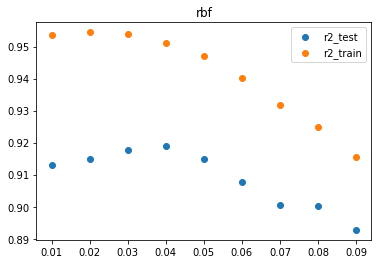

In [ ]:
r2_test = []
r2_train = []
epsilons = np.arange(0.01,0.1,0.01)

for epsilon in epsilons:
    model = SVR(kernel = 'rbf', C = C, epsilon=epsilon)
    _ = model.fit(X_train, Y_train)

    y_train_predict = model.predict(X_train)
    r2_train.append(r2_score(Y_train, y_train_predict))


    y_test_predict = model.predict(X_test)
    r2_test.append(r2_score(Y_test, y_test_predict))
plt.title('rbf')
plt.scatter(epsilons, r2_test, label= 'r2_test')
plt.scatter(epsilons, r2_train, label= 'r2_train')
plt.legend(loc = 'best')
plt.show()

In [ ]:
#Найти epsilon, при котором R2_test достигает максимума 

max = 0

for i in range(len(r2_test)):
  if max<r2_test[i]:
    max = r2_test[i]
    epsilon = epsilons[i]
print('epsilon = ', epsilon)

epsilon =  0.04


Получить итоговую модель для SVR 

In [ ]:
model = SVR(kernel = 'rbf', C= С,epsilon = epsilon)
_ = model.fit(X_train, Y_train)

y_train_predict = model.predict(X_train)
rmse_train_3 = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_train_3 = r2_score(Y_train, y_train_predict)

y_test_predict = model.predict(X_test)
rmse_test_3 = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test_3 = r2_score(Y_test, y_test_predict)

print('rmse_ train', rmse_train_3)
print('r2_ train', r2_train_3)
print('rmse_ test', rmse_test_3)
print('r2_ test', r2_test_3)

rmse_ train 0.05107408942734177
r2_ train 0.9385071606664006
rmse_ test 0.05432113106154271
r2_ test 0.9236806113877195


Нарисовать Y; Y predicted

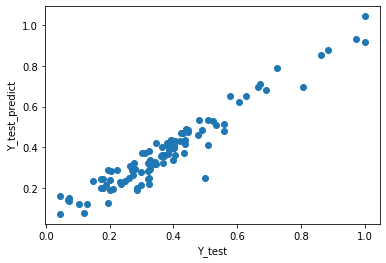

Text(0, 0.5, 'Y_train_predict')

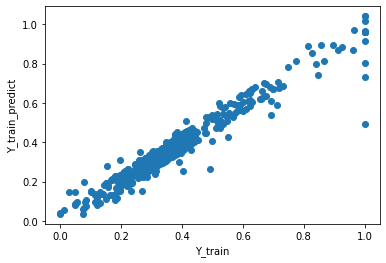

In [ ]:
#Нарисовать связь Y_test и Y_test_predict
plt.scatter(Y_test,y_test_predict)
plt.xlabel('Y_test')
plt.ylabel('Y_test_predict')
plt.show()
#Нарисовать связь Y_train и Y_train_predict
plt.scatter(Y_train,y_train_predict)
plt.xlabel('Y_train')
plt.ylabel('Y_train_predict')

#Результаты

Из трех методов регрессии получил значения R2, RMSE для обучающей и тестированной выборок. Здесь нужны только итоговые модели каждого метода

In [ ]:
method = ['Линейная регрессия', 'Формула нададая-ватсон', 'SVR']
R2_test = [r2_test_1, r2_test_2, r2_test_3]
R2_train = [r2_train_1, r2_train_2, r2_train_3]
RMSE_test = [rmse_test_1, rmse_test_2, rmse_test_3]
RMSE_train = [rmse_train_1, rmse_train_2,rmse_train_3]
table = pd.DataFrame({"method": method, "R2_test": R2_test, "R2_train": R2_train, "RMSE_test": RMSE_test, "RMSE_train": RMSE_train})
table

,method,R2_test,R2_train,RMSE_test,RMSE_train
0,Линейная регрессия,0.733449,0.738339,0.101518,0.105356
1,Формула нададая-ватсон,0.832230,0.978287,0.080539,0.030349
2,SVR,0.923681,0.938507,0.054321,0.051074


У модели SVR (с ядром 'rbf', C  = 6.5, epsilon = 0.05) есть R2_test = max; RMSE = min. Значит, что эта модель SVR  лучше чем остальные (train_test_split с параметром text_size = 0.2; если с другим text_size (С, epsilon) могут немножко измениться) 

Проблема столкнулись во время выполнения: 


1.   нет библитеки для формулы Надарая_Ватсон.  
2.   При исследовании эксперимента этим методом, для некоторых значений h, R2 < 0.
3. Не возможно использовать StandardScaler для нормировки данных Y, поэтому попробовал min-max scaling.




Полученные результаты совпадают с ожидаемыми результатами.